In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the dataset (if not already loaded)
df = pd.read_csv('dataset_52-person-from-2021-02-05_2023-06-12_21-34-17-266_with_sentiment.csv')

# Check for missing values
missing_data = df.isnull().sum()
print("Missing values per column:\n", missing_data)

# Check the data types and summary statistics
df_info = df.info()
df_summary = df.describe()

print("Dataset Info:\n", df_info)
print("Dataset Summary Statistics:\n", df_summary)


Missing values per column:
 Unnamed: 0                           0
created_at                           0
favorite_count                       0
full_text                            0
reply_count                          0
retweet_count                        0
clean_text                           0
importance_coefficient               0
importance_coefficient_normalized    0
new_coins                            0
scores                               0
compound                             0
sentiment_type                       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         16512 non-null  int64  
 1   created_at                         16512 non-null  object 
 2   favorite_count                     16512 non-null  int64  
 3   full_text         

In [ ]:
# Drop the index column
df = df.drop(columns=['Unnamed: 0'])


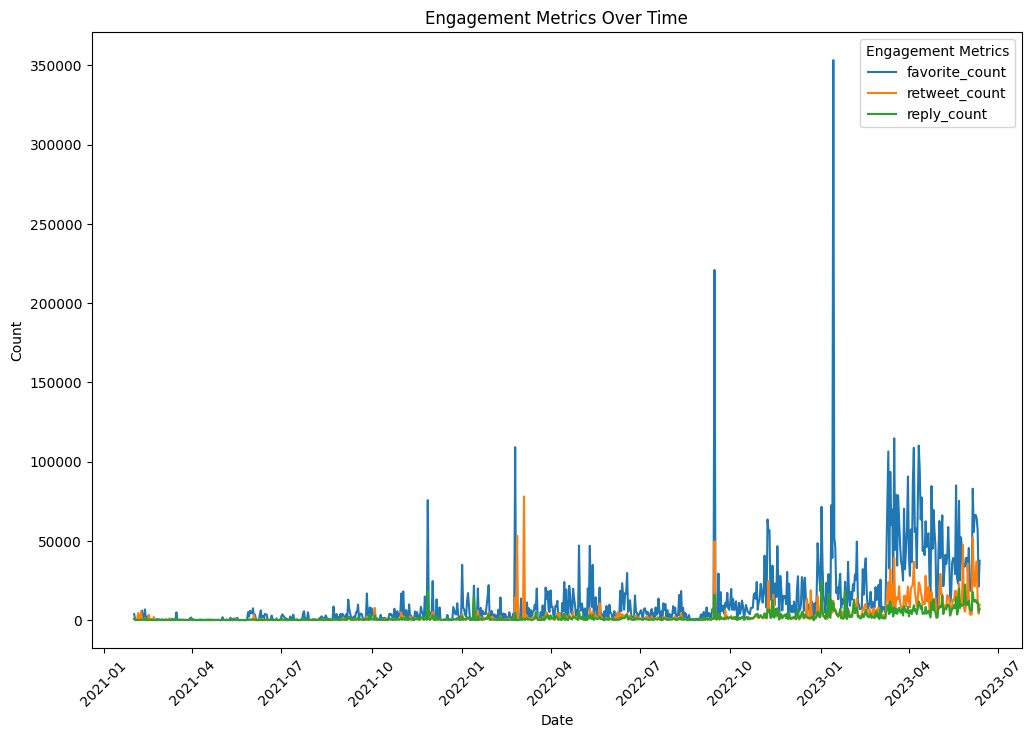

In [ ]:
# Convert 'created_at' to datetime format
df['created_at'] = pd.to_datetime(df['created_at'], format='%m/%d/%Y')

# Group by date and sum the engagement metrics
engagement_per_day = df.groupby(df['created_at'].dt.date)[['favorite_count', 'retweet_count', 'reply_count']].sum()

# Plot engagement over time
engagement_per_day.plot(figsize=(12, 8))
plt.title('Engagement Metrics Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Engagement Metrics')
plt.show()


<ipython-input-5-213091920c0d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment_type', palette='Set2')


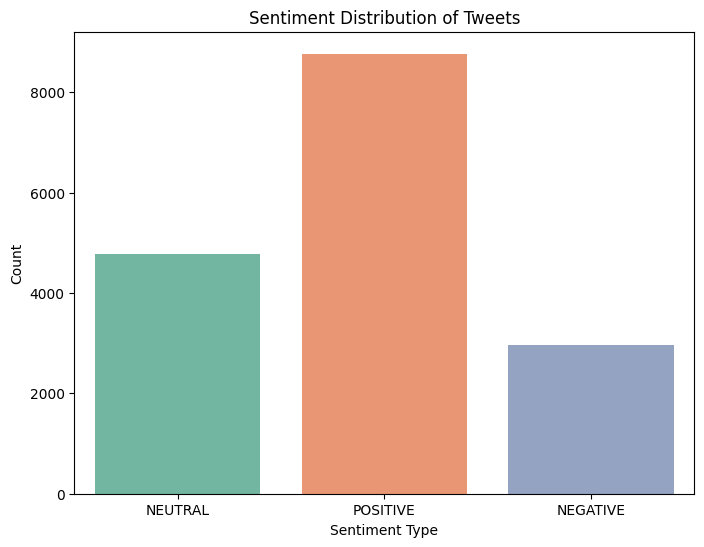

In [ ]:
# Sentiment distribution
sentiment_counts = df['sentiment_type'].value_counts()

# Plot the sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sentiment_type', palette='Set2')
plt.title('Sentiment Distribution of Tweets')
plt.xlabel('Sentiment Type')
plt.ylabel('Count')
plt.show()


<Axes: title={'center': 'Median Engagement by Sentiment'}, xlabel='sentiment_type'>

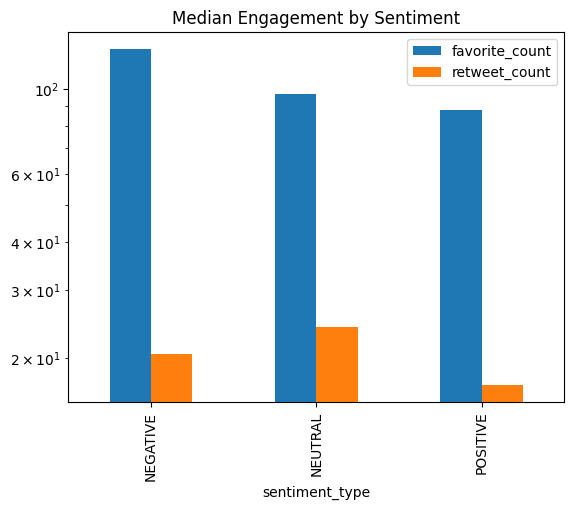

In [ ]:
# Group by sentiment and compare median engagement
df.groupby('sentiment_type')[['favorite_count', 'retweet_count']].median().plot(
    kind='bar', logy=True, title="Median Engagement by Sentiment"
)

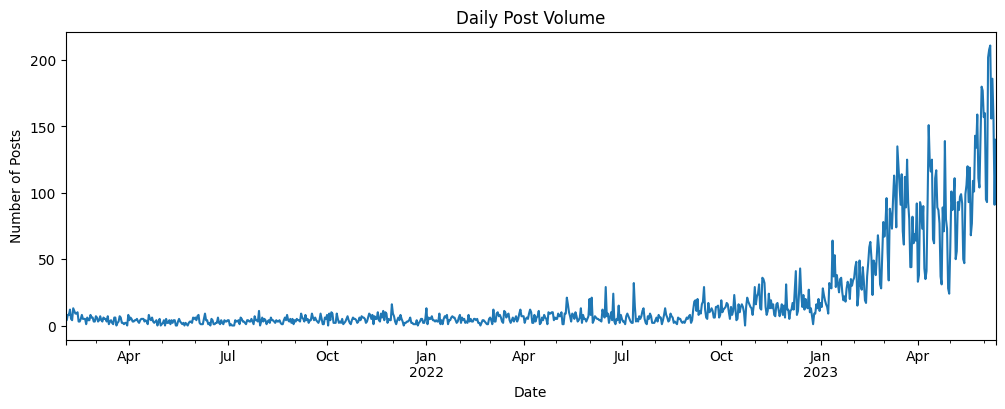

In [ ]:
# Daily post frequency
df.set_index('created_at').resample('D').size().plot(
    title='Daily Post Volume',
    figsize=(12, 4)
)
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.show()


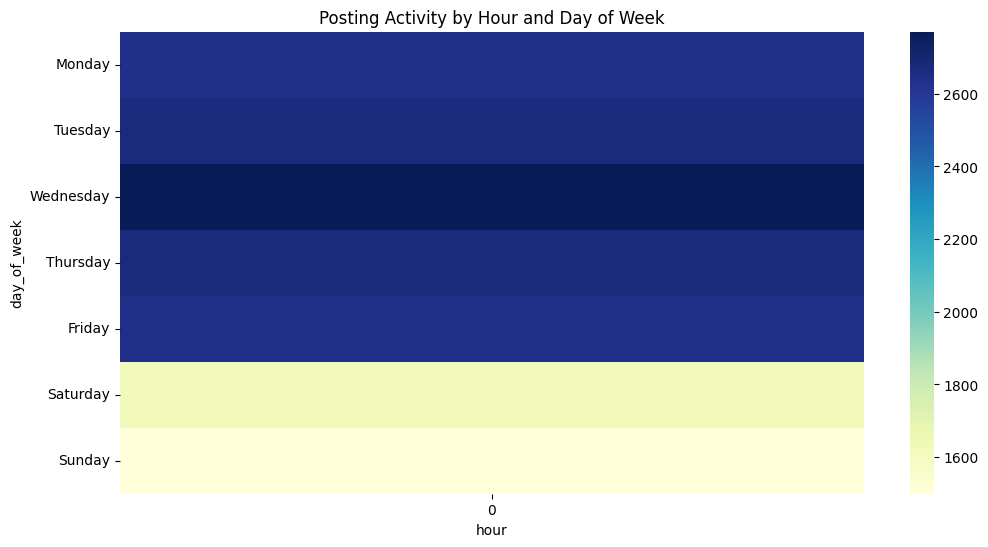

In [ ]:
# Extract hour and day of week
df['hour'] = df['created_at'].dt.hour
df['day_of_week'] = df['created_at'].dt.day_name()

# Pivot for heatmap
heatmap_data = df.groupby(['day_of_week', 'hour']).size().unstack()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data.loc[days_order], cmap='YlGnBu', fmt='g')
plt.title('Posting Activity by Hour and Day of Week')
plt.show()

<ipython-input-9-6abe22cb1dee>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('created_at').resample('M').size().plot(ax=ax1, color='tab:blue')
<ipython-input-9-6abe22cb1dee>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('created_at').resample('M')['compound'].mean().plot(


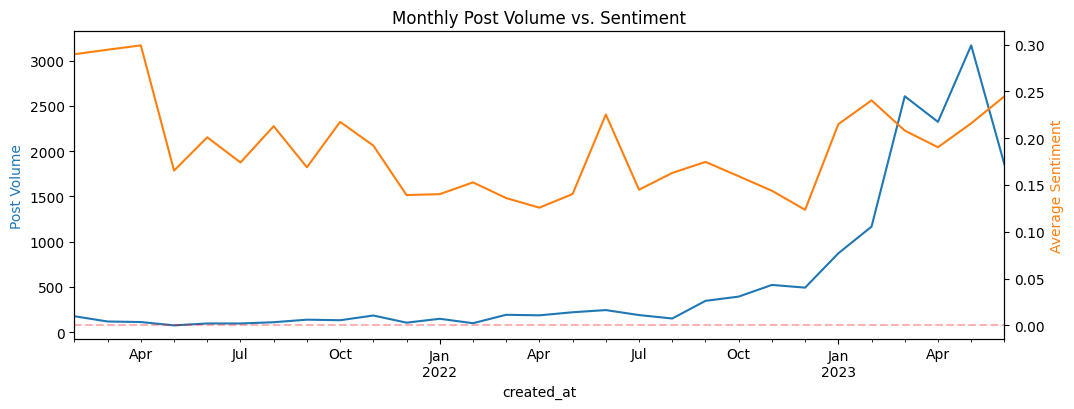

In [ ]:
# Resample by month, then plot sentiment and volume
fig, ax1 = plt.subplots(figsize=(12, 4))

# Plot post volume
ax1.set_ylabel('Post Volume', color='tab:blue')
df.set_index('created_at').resample('M').size().plot(ax=ax1, color='tab:blue')

# Plot sentiment (secondary axis)
ax2 = ax1.twinx()
df.set_index('created_at').resample('M')['compound'].mean().plot(
    ax=ax2, color='tab:orange', label='Avg Sentiment'
)
ax2.set_ylabel('Average Sentiment', color='tab:orange')
ax2.axhline(0, color='red', linestyle='--', alpha=0.3)
plt.title('Monthly Post Volume vs. Sentiment')
plt.show()

Text(0.5, 1.0, 'Word Count vs. Likes (Colored by Sentiment)')

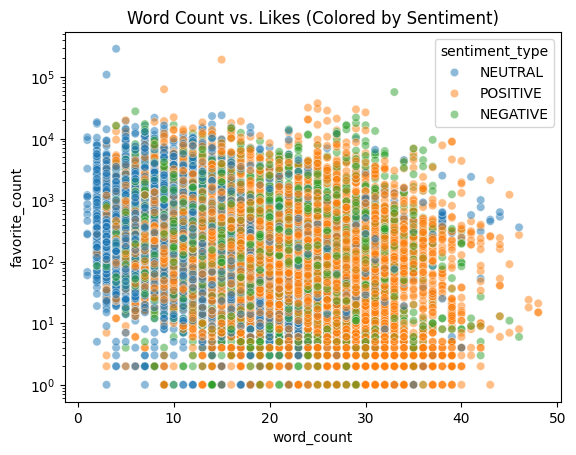

In [ ]:
# Add text length features
df['text_length'] = df['clean_text'].str.len()
df['word_count'] = df['clean_text'].str.split().str.len()

# Scatter plot: Word Count vs. Likes
sns.scatterplot(data=df, x='word_count', y='favorite_count', hue='sentiment_type', alpha=0.5)
plt.yscale('log')
plt.title("Word Count vs. Likes (Colored by Sentiment)")

   Topic 0 Topic 1  Topic 2      Topic 3     Topic 4
0  bitcoin     btc  bitcoin          eth       whale
1       rt    time      btc   whalestats         100
2   update     eth   market      binance         eth
3     like     day   crypto         defi         bbw
4      amp  better       rt  transaction          10
5  support    pepe     time     ethereum   eth whale
6   crypto    usdt     year          usd         amp
7      btc    left      amp       bought     biggest
8     long     pay      buy         cake  whalestats
9      sec  market    price           rt   babywhale


<ipython-input-11-88e41f568f5a>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='dominant_topic', y='favorite_count', data=df,
<ipython-input-11-88e41f568f5a>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='dominant_topic', y='compound', data=df, palette='viridis')


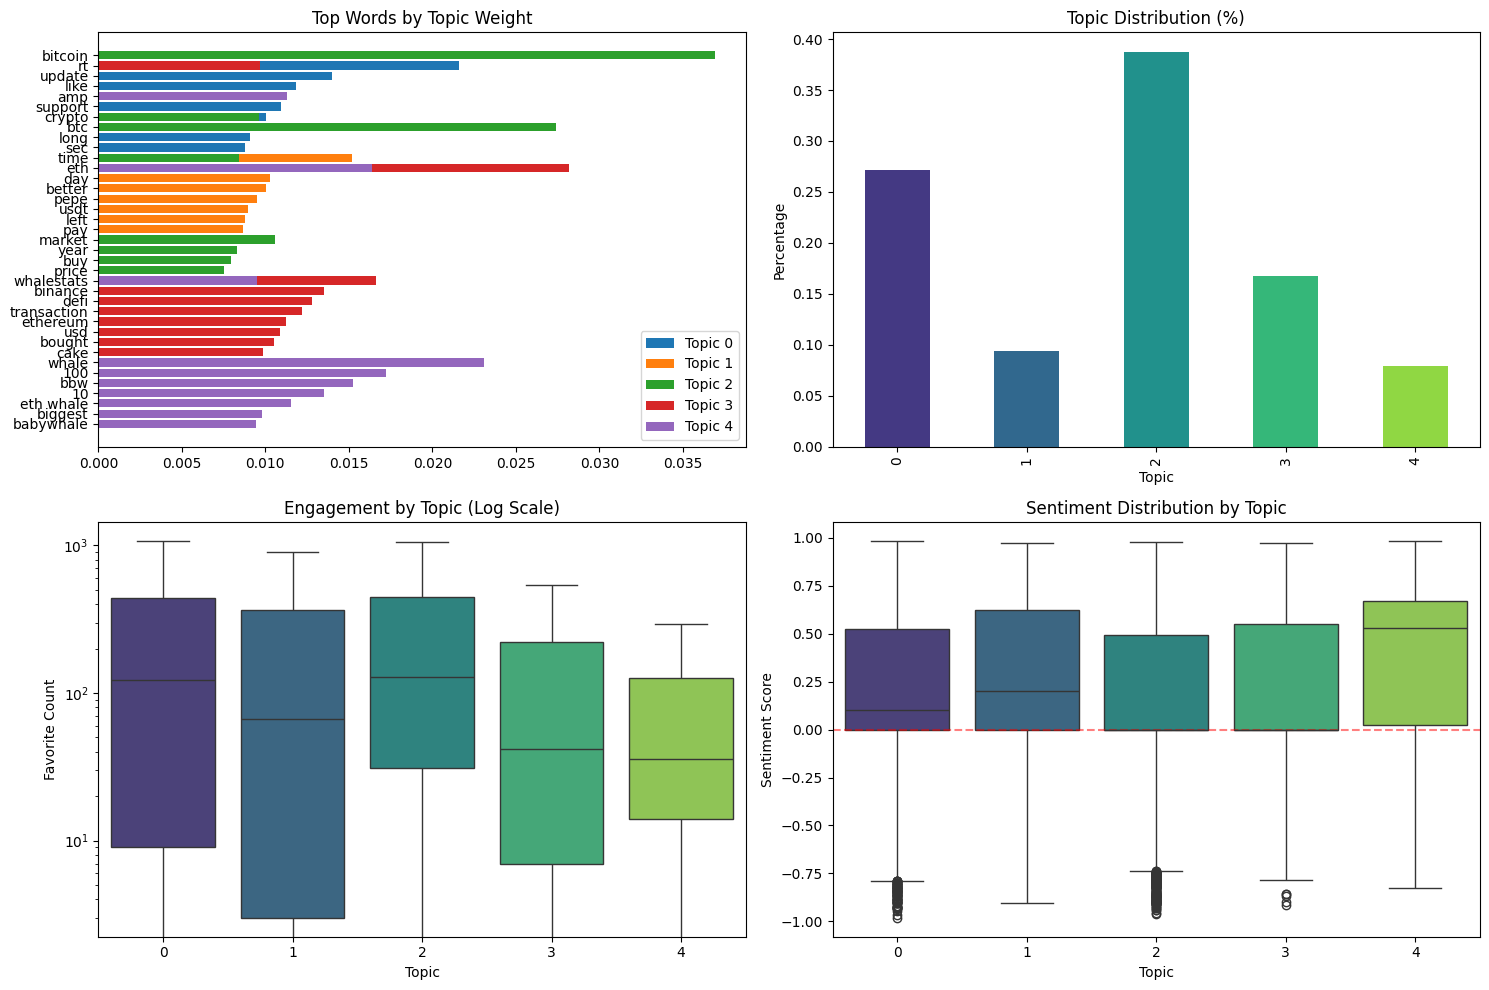

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

vectorizer = CountVectorizer(
    stop_words='english',
    max_df=0.8,        # Filter overly common words
    min_df=10,         # Filter rare words
    ngram_range=(1, 2), # Include bigrams
    max_features=5000   # Limit vocabulary size
)
X = vectorizer.fit_transform(df['clean_text'])

lda = LatentDirichletAllocation(
    n_components=5,
    random_state=42,
    learning_method='online',
    batch_size=128,
    max_iter=25,
    learning_offset=50.,
    n_jobs=-1          # Use all CPU cores
)
lda.fit(X)

def print_topic_table(model, feature_names, n_words=10):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        topics[f"Topic {topic_idx}"] = [feature_names[i] for i in topic.argsort()[:-n_words-1:-1]]
    return pd.DataFrame(topics)

topic_table = print_topic_table(lda, vectorizer.get_feature_names_out())
print(topic_table)


df['dominant_topic'] = lda.transform(X).argmax(axis=1)
df['topic_confidence'] = lda.transform(X).max(axis=1)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
topic_word_weights = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]
for i, topic_weights in enumerate(topic_word_weights):
    top_indices = topic_weights.argsort()[-10:][::-1]
    top_words = [vectorizer.get_feature_names_out()[i] for i in top_indices]
    plt.barh(top_words, topic_weights[top_indices], label=f'Topic {i}')
plt.gca().invert_yaxis()
plt.title('Top Words by Topic Weight')
plt.legend()

# Topic Prevalence
plt.subplot(2, 2, 2)
topic_counts = df['dominant_topic'].value_counts(normalize=True).sort_index()
topic_counts.plot(kind='bar', color=sns.color_palette('viridis', 5))
plt.title('Topic Distribution (%)')
plt.xlabel('Topic')
plt.ylabel('Percentage')

# Engagement by Topic
plt.subplot(2, 2, 3)
sns.boxplot(x='dominant_topic', y='favorite_count', data=df,
           showfliers=False, palette='viridis')
plt.yscale('log')
plt.title('Engagement by Topic (Log Scale)')
plt.xlabel('Topic')
plt.ylabel('Favorite Count')

# Sentiment by Topic
plt.subplot(2, 2, 4)
sns.boxplot(x='dominant_topic', y='compound', data=df, palette='viridis')
plt.axhline(0, color='red', linestyle='--', alpha=0.5)
plt.title('Sentiment Distribution by Topic')
plt.xlabel('Topic')
plt.ylabel('Sentiment Score')

plt.tight_layout()
plt.show()

topic_labels = {
    0: "Ethereum/DeFi Transactions",
    1: "Bitcoin General Discussion",
    2: "Market Technical Analysis",
    3: "Whale Activity Tracking",
    4: "Miscellaneous Crypto Talk"
}

df['topic_label'] = df['dominant_topic'].map(topic_labels)

In [ ]:
# See most representative tweets for each topic
for topic_num in range(5):
    print(f"\n=== Sample tweets for {topic_labels[topic_num]} ===")
    print(df[df['dominant_topic'] == topic_num]['full_text'].sample(3).values)


=== Sample tweets for Ethereum/DeFi Transactions ===
['stay safe in crypto. watch out for fake giveaways.\n\nthe team wrote some top tips on how to spot and avoid them in this blog.\n\nhttps://t.co/6f3jw4qc6z'
 'looking back at alts since their jan rallies, iâ\x80\x99d never have thought that the distribution phase would have been long drawn out over 3 months from feb - end apr. \n\ntiming the trend down wasnâ\x80\x99t easy but it did offer some great range plays. \n\nthe bigger the range, the greater theâ\x80¦'
 "i'm having an aperitif before dinner... i saw $sol from iphone... this shitty coin always has a pa that scams lol... but here it's nice on the weekly to have a continuation up i hate this coin ð\x9f\x98\x82"]

=== Sample tweets for Bitcoin General Discussion ===
['verified winningð\x9f\x92¥\n\nso many scammers in #crypto!\nthis is why we verify our winners with time stamped telegram messages!\n\n#btc short +334%\nsent: yesterday @ 8:25 pm\nviews: 477\n\n(37) $99 lifetime mem

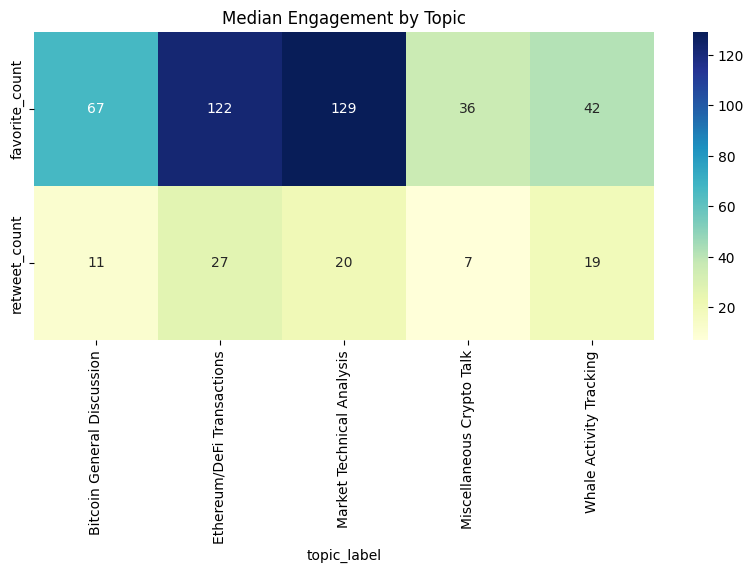

<ipython-input-13-4e3cee90bb57>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_topics = df.groupby([pd.Grouper(key='date', freq='M'), 'topic_label']).size().unstack()


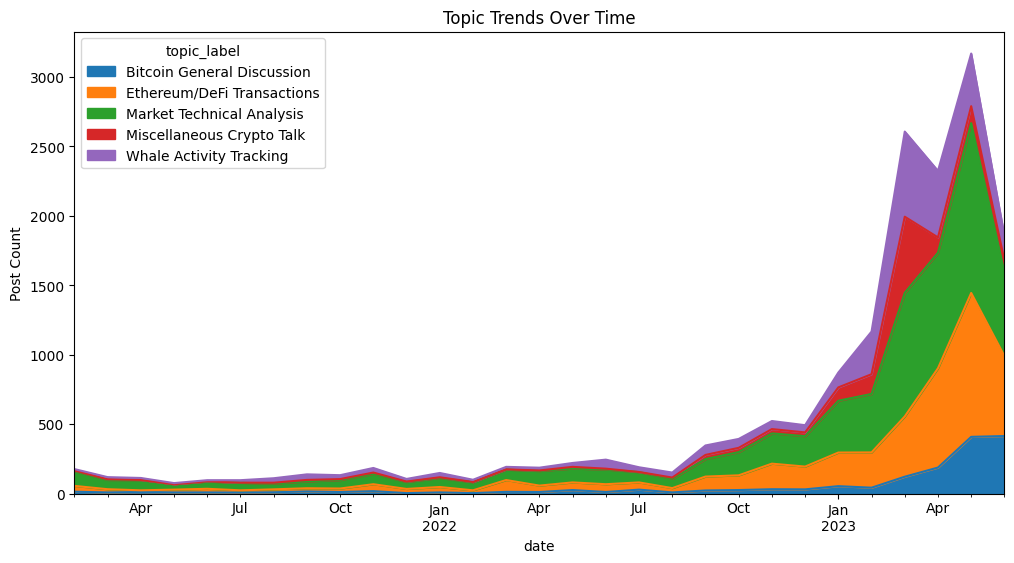

In [ ]:
# Topic Engagement Heatmap
topic_engagement = df.groupby('topic_label')[['favorite_count','retweet_count']].median()
plt.figure(figsize=(10,4))
sns.heatmap(topic_engagement.T, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Median Engagement by Topic")
plt.show()

# Temporal Analysis
df['date'] = pd.to_datetime(df['created_at'])
monthly_topics = df.groupby([pd.Grouper(key='date', freq='M'), 'topic_label']).size().unstack()
monthly_topics.plot(kind='area', stacked=True, figsize=(12,6))
plt.title("Topic Trends Over Time")
plt.ylabel("Post Count")
plt.show()

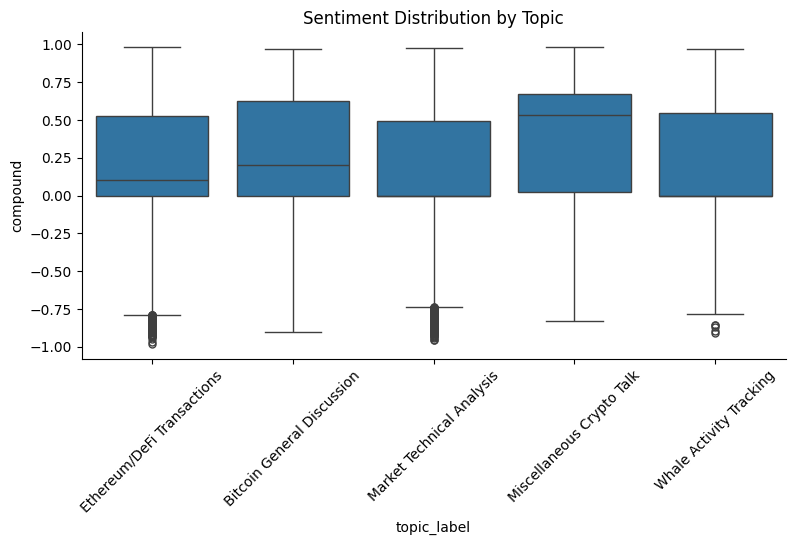

In [ ]:
# Sentiment by Topic
sns.catplot(data=df, x='topic_label', y='compound', kind='box', height=4, aspect=2)
plt.xticks(rotation=45)
plt.title("Sentiment Distribution by Topic")
plt.show()